C:\Users\abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\obspy\signal\filter.py:62: UserWarning: Selected high corner frequency (7.0) of bandpass is at or above Nyquist (3.3125). Applying a high-pass instead.
  warnings.warn(msg)


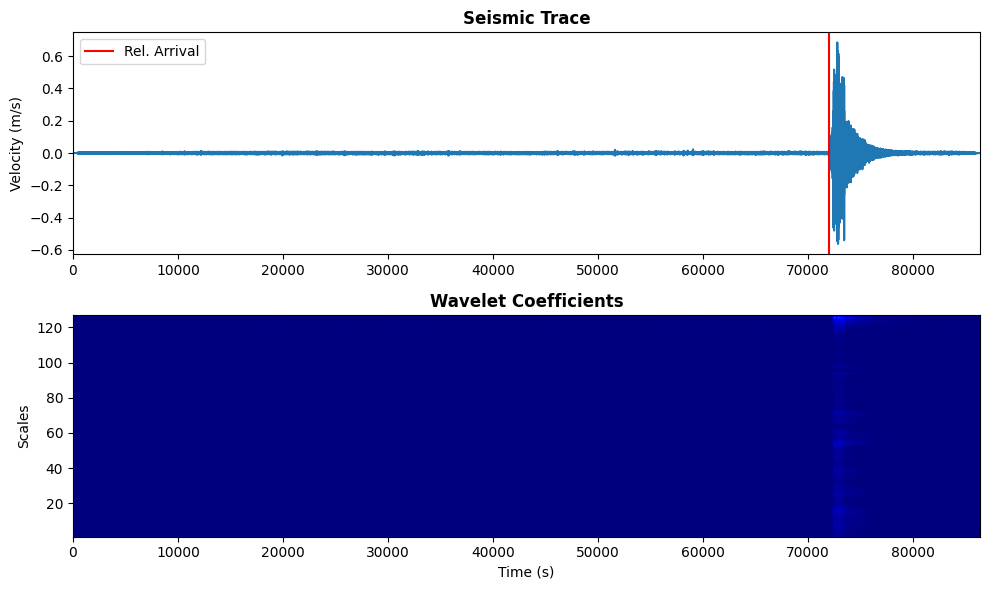

Iteration 1: Score = 0.0, Params = {'minfreq': 0.3, 'maxfreq': 7.0, 'wavelet': 'mexh', 'scales': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127])}


C:\Users\abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\obspy\signal\filter.py:62: UserWarning: Selected high corner frequency (5.0) of bandpass is at or above Nyquist (3.3125). Applying a high-pass instead.
  warnings.warn(msg)


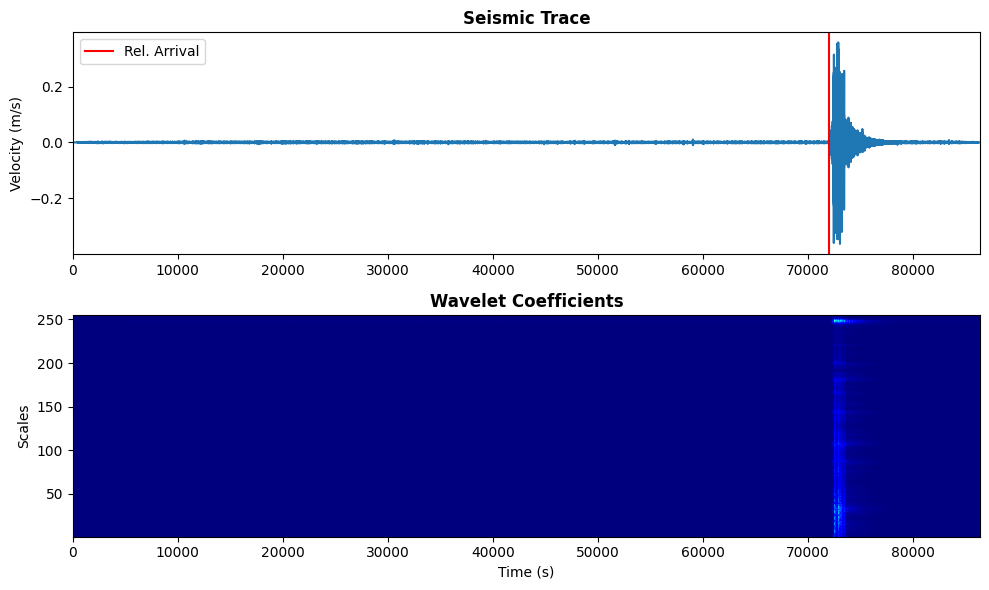

Iteration 2: Score = 0.0, Params = {'minfreq': 1.0, 'maxfreq': 5.0, 'wavelet': 'cmor2.0-1.0', 'scales': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 

C:\Users\abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\obspy\signal\filter.py:62: UserWarning: Selected high corner frequency (10.0) of bandpass is at or above Nyquist (3.3125). Applying a high-pass instead.
  warnings.warn(msg)


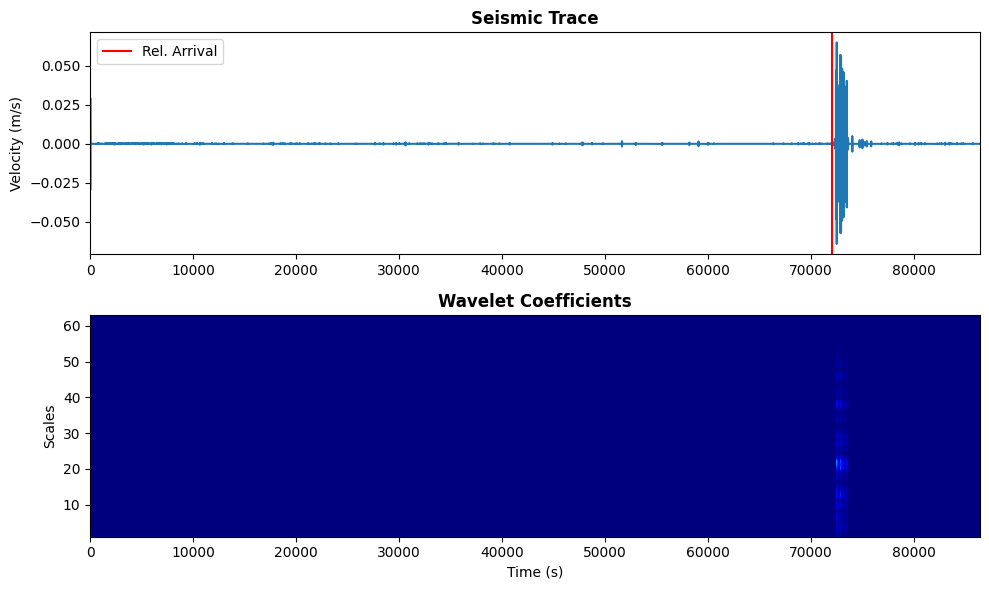

Iteration 3: Score = 0.0, Params = {'minfreq': 3.0, 'maxfreq': 10.0, 'wavelet': 'mexh', 'scales': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])}


C:\Users\abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\obspy\signal\filter.py:62: UserWarning: Selected high corner frequency (7.0) of bandpass is at or above Nyquist (3.3125). Applying a high-pass instead.
  warnings.warn(msg)


KeyboardInterrupt: 

In [2]:
import os
import pywt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from obspy import read
from sklearn.preprocessing import MinMaxScaler
from obspy.signal.filter import bandpass
from sklearn.model_selection import RandomizedSearchCV

# Load the lunar seismic event catalog
lunar_cat = 'A:/space_apps_2024_seismic_detection/data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv'
lunar_df = pd.read_csv(lunar_cat)
lunar_event = dict(zip(lunar_df['filename'],  lunar_df['time_rel(sec)']))

def wavelet_transform(data, wavelet, scales):
    coefficients, frequencies = pywt.cwt(data, scales, wavelet)
    return np.abs(coefficients), frequencies

def plot_trace(tr_times, tr_data, arrival, coefficients, scales):
    fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 6))

    ax.plot(tr_times, tr_data)
    ax.axvline(x=arrival, color='red', label='Rel. Arrival')  # Highlight arrival time
    ax.legend(loc='upper left')

    ax.set_xlim([min(tr_times), max(tr_times)])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_title('Seismic Trace', fontweight='bold')

    # Plot the wavelet coefficients (time-frequency representation)
    ax2.imshow(coefficients, extent=[tr_times.min(), tr_times.max(), scales.min(), scales.max()],
               aspect='auto', interpolation='bilinear', cmap='jet')
    ax2.set_ylabel('Scales')
    ax2.set_xlabel('Time (s)')
    ax2.set_title('Wavelet Coefficients', fontweight='bold')

    plt.tight_layout()
    plt.show()

def preprocess_mseed(file_path, arrival, minfreq=0.5, maxfreq=5.0, wavelet='cmor2.0-1.0', scales=np.arange(1, 100)):
    st = read(file_path)
    tr = st[0]
    
    # Handle missing values in the data
    if np.count_nonzero(np.isnan(tr.data)) > 0:
        print(f"Warning: Missing values found in {tr.id}. Interpolation may be needed.")
        tr.interpolate(method='linear', tolerance=0.1, sampling_rate=tr.stats.sampling_rate)
    
    data = tr.data.reshape(-1, 1)
    tr_times = tr.times()
    
    # Normalize data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    tr.data = normalized_data.flatten()
    
    # Apply bandpass filter to remove noise
    tr.filter("bandpass", freqmin=minfreq, freqmax=maxfreq)
    
    # Perform wavelet transform
    coefficients, frequencies = wavelet_transform(tr.data, wavelet, scales)
    
    plot_trace(tr_times, tr.data, arrival, coefficients, scales)
    
    return tr.data, coefficients

# Custom scoring function for RandomizedSearchCV
def wavelet_energy_score(params, file_path, arrival_time):
    minfreq = params['minfreq']
    maxfreq = params['maxfreq']
    wavelet = params['wavelet']
    scales = params['scales']

    # Preprocess the data with current parameters
    tr_data, coefficients = preprocess_mseed(file_path, arrival_time, minfreq=minfreq, maxfreq=maxfreq, 
                                             wavelet=wavelet, scales=scales)
    
    # Define a window around the arrival time and calculate energy
    arrival_idx = int(arrival_time * 100)  # Convert time to index (assuming 100 Hz sampling rate)
    window = 100  # Window of 100 samples before and after the arrival time
    event_window = coefficients[:, max(0, arrival_idx - window): min(arrival_idx + window, len(tr_data))]
    
    # Calculate total energy in the wavelet coefficients
    energy = np.sum(event_window**2)
    
    return energy

# Adjusted hyperparameter grid for RandomizedSearchCV
param_grid = {
    'minfreq': [0.1, 0.3, 0.5, 1.0, 3.0],  # Min frequency for bandpass filter
    'maxfreq': [5.0, 7.0, 10.0],  # Max frequency for bandpass filter
    'wavelet': ['cmor1.5-1.0', 'cmor2.0-1.0', 'mexh', 'morl'],  # Different wavelet families
    'scales_idx': [0, 1, 2]  # Indices for scale ranges
}

# Define different scale ranges
scales_options = [np.arange(1, 64), np.arange(1, 128), np.arange(1, 256)]

# Randomized Search for best parameters
def run_random_search(file_path, arrival_time, n_iter=10):
    best_params = None
    best_score = -np.inf

    for i in range(n_iter):
        # Randomly sample parameters
        params = {k: np.random.choice(v) for k, v in param_grid.items()}
        
        # Select the correct scale range based on the scale index
        params['scales'] = scales_options[params['scales_idx']]
        del params['scales_idx']  # Remove the index key
        
        # Calculate the score (energy) for the current parameters
        score = wavelet_energy_score(params, file_path, arrival_time)
        print(f"Iteration {i+1}: Score = {score}, Params = {params}")
        
        if score > best_score:
            best_score = score
            best_params = params

    print(f"Best Score: {best_score}, Best Params: {best_params}")
    return best_params

# Directory with .mseed files and process one file
mseed_directory = 'A:/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA'
file_path = os.path.join(mseed_directory, 'xa.s12.00.mhz.1970-06-26HR00_evid00009.mseed')
arrival_time = lunar_event['xa.s12.00.mhz.1970-06-26HR00_evid00009']

# Run Randomized Search
best_params = run_random_search(file_path, arrival_time, n_iter=20)

# Use the best parameters to preprocess and plot the data
filtered_data, wavelet_coefficients = preprocess_mseed(file_path, arrival_time, 
                                                       minfreq=best_params['minfreq'], 
                                                       maxfreq=best_params['maxfreq'], 
                                                       wavelet=best_params['wavelet'], 
                                                       scales=best_params['scales'])

print(f"Filtered Data: {filtered_data}")
print(f"Wavelet Coefficients: {wavelet_coefficients}")
